# THIS FILE IS DECREPIT, USE DRAFT_03

# ~~Train Delay Data~~

### Import library's

In [2]:
# import keras
import os
import pandas as pd, numpy as np, copy
import seaborn as sns
import matplotlib.pyplot as plt

# Set the option to display all columns, without the "..." in the middle
pd.set_option('display.max_columns', None)


2024-04-23 19:16:02.394527: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Location of files

In [3]:
train_data_dir = 'data/delay data' # Directory where the csv data is stored

test_data = pd.read_csv('data/delay data/LIVST_NRCH_OD_a51_2017/LIVST_NRCH_OD_a51_2017_04_04.csv') # an example file of a single csv

# Data Exploration

This section will explore and describe aspects of the data.

Columns: ['rid', 'tpl', 'pta', 'ptd', 'wta', 'wtp', 'wtd', 'arr_et', 'arr_wet', 'arr_atRemoved', 'pass_et', 'pass_wet', 'pass_atRemoved', 'dep_et', 'dep_wet', 'dep_atRemoved', 'arr_at', 'pass_at', 'dep_at', 'cr_code','lr_code']

Encoding Columns
- Columns for Binary Encoding: ['arr_atRemoved', 'pass_atRemoved', 'dep_atRemoved']
- Columns for One Hot Encoding: ['arr_wet']
- Columns for Label Encoding: ['tpl', 'dep_et']
- Columns for Target Encoding: ['pta', 'ptd', 'wta', 'wtp', 'wtd', 'pass_et']
- Columns for for y: ['arr_at', 'pass_at', 'dep_at']

### Data View

In [4]:
test_data.head(50)

,rid,tpl,pta,ptd,wta,wtp,wtd,arr_et,arr_wet,arr_atRemoved,pass_et,pass_wet,pass_atRemoved,dep_et,dep_wet,dep_atRemoved,arr_at,pass_at,dep_at,cr_code,lr_code
0,201704017101248,LIVST,NaN,06:30,NaN,NaN,06:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,06:29,NaN,NaN
1,201704017101248,BTHNLGR,NaN,NaN,NaN,06:33,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:32,NaN,NaN,NaN
2,201704017101248,BOWJ,NaN,NaN,NaN,06:35,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:34,NaN,NaN,NaN
3,201704017101248,STFD,NaN,06:38,06:37:30,NaN,06:38:30,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,06:36,NaN,06:37,NaN,NaN
4,201704017101248,MRYLAND,NaN,NaN,NaN,06:40,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:38,NaN,NaN,NaN
5,201704017101248,FRSTGTJ,NaN,NaN,NaN,06:41,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:40,NaN,NaN,NaN
6,201704017101248,MANRPK,NaN,NaN,NaN,06:41:30,NaN,NaN,NaN,NaN,06:40,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,201704017101248,ILFORD,NaN,NaN,NaN,06:42:30,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:41,NaN,NaN,NaN
8,201704017101248,SVNKNGS,NaN,NaN,NaN,06:43,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:42,NaN,NaN,NaN
9,201704017101248,GODMAYS,NaN,NaN,NaN,06:43:30,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:42,NaN,NaN,NaN


In [3]:
test_data.sample(10)

,rid,tpl,pta,ptd,wta,wtp,wtd,arr_et,arr_wet,arr_atRemoved,pass_et,pass_wet,pass_atRemoved,dep_et,dep_wet,dep_atRemoved,arr_at,pass_at,dep_at,cr_code,lr_code
14401,201704217101312,SHENFLD,NaN,NaN,NaN,12:53:30,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,12:52,NaN,NaN,NaN
19146,201704277101375,NRCHTPJ,NaN,NaN,NaN,19:21,NaN,NaN,NaN,NaN,19:25,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16907,201704257101366,NRCH,18:42,NaN,18:40,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,18:45,NaN,NaN,NaN,NaN
15592,201704247101318,NRCH,14:50,NaN,14:48,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,14:52,NaN,NaN,NaN,NaN
8780,201704127101253,STFD,NaN,NaN,NaN,07:06,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,07:06,NaN,NaN,NaN
19641,201704287101260,HRLDWOD,NaN,NaN,NaN,08:11,NaN,NaN,NaN,NaN,08:10,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
7594,201704117101240,SHENFLD,NaN,NaN,NaN,06:21,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:23,NaN,NaN,NaN
10816,201704187101247,TROWSEJ,NaN,NaN,NaN,08:24,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,08:25,NaN,NaN,NaN
2938,201704047101390,NRCHTPJ,NaN,NaN,NaN,20:05,NaN,NaN,NaN,NaN,20:04,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4945,201704067101372,IPSWHJN,NaN,NaN,NaN,18:18,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,18:16,NaN,NaN,NaN


### Data description

From the description we can only see 5 columns. These are the only columns with numerical values.

[pass_wet] and [dep_wet] only contain NaN values, this is confirmed in the cells below.

In [4]:
test_data.describe()

,rid,pass_wet,dep_wet,cr_code,lr_code
count,2.059300e+04,0.0,0.0,328.000000,3679.000000
mean,2.017042e+14,NaN,NaN,135.536585,147.942104
std,8.756900e+07,NaN,NaN,25.709478,20.222570
min,2.017040e+14,NaN,NaN,100.000000,109.000000
25%,2.017041e+14,NaN,NaN,111.000000,137.000000
50%,2.017041e+14,NaN,NaN,126.000000,145.000000
75%,2.017042e+14,NaN,NaN,158.000000,158.000000
max,2.017043e+14,NaN,NaN,179.000000,186.000000


Below confirms that the two columns only contain NaN values.

In [5]:
columns_with_only_nan = test_data.columns[test_data.isnull().all()]
print(columns_with_only_nan)

Index(['pass_wet', 'dep_wet'], dtype='object')


### Data NaN Values

In [6]:
import pandas as pd

def na_info(data):
    na_dict = {}
    for column in data.columns:
        na_dict[column] = {
            'Has NA': data[column].isnull().values.any(),
            'NA Count': data[column].isnull().sum(),
            'NA Percentage': (data[column].isnull().sum() / len(data[column])) * 100
        }
    return pd.DataFrame(na_dict).T

na_df = na_info(test_data)
na_df

,Has NA,NA Count,NA Percentage
rid,False,0,0.0
tpl,False,0,0.0
pta,True,16506,80.15345
ptd,True,16242,78.871461
wta,True,16247,78.895741
wtp,True,5013,24.343223
wtd,True,16242,78.871461
arr_et,True,20582,99.946584
arr_wet,True,20576,99.917448
arr_atRemoved,True,16345,79.371631


### Data Types

The majority of this dataset is 'object' dataype, this is due to the times being a string value.

In [7]:
test_data.dtypes

rid                 int64
tpl                object
pta                object
ptd                object
wta                object
wtp                object
wtd                object
arr_et             object
arr_wet            object
arr_atRemoved      object
pass_et            object
pass_wet          float64
pass_atRemoved     object
dep_et             object
dep_wet           float64
dep_atRemoved      object
arr_at             object
pass_at            object
dep_at             object
cr_code           float64
lr_code           float64
dtype: object

### Number of unique values per column

Below code yields the number of unique values per column. These values are required to confirm a choice of categorical encoding algorithm.


#### Binary Encoding
Since there are three possible columns with 2 unique values: [arr_atRemoved, pass_atRemoved, dep_atRemoved]
Binary encoding could be ideal

#### One-Hot Encoding
There are two columns with a small number of unique vales: [cr_code and lr_code]
One-Hot encoding could be viable

#### Label Encoding
Columns with a moderate number of unique values could benefit from Label Encoding, columns such as: [tpl, arr_et, dep_et]

#### Frequency or Target Encoding
For the columns with a large number of unique values, either Frequency or Target Encoding would be ideal. Columns such as: [rid, pta, ptd, wta, wtp, wtd, pass_et, arr_at, pass_at, dep_at]

In [8]:
columns_for_binary_encoding = []
columns_for_one_hot_encoding = []
columns_for_label_encoding = []
columns_for_target_encoding = []

labels = ['arr_at', 'pass_at', 'dep_at']

encoding_dict = {}

for column in test_data.columns:
    if test_data[column].dtype == 'object' and column not in labels:
        if len(test_data[column].unique()) == 2:
            columns_for_binary_encoding.append(column)
            encoding_dict[column] = 'Binary Encoding'

        elif len(test_data[column].unique()) > 2 and len(test_data[column].unique()) < 10:
            columns_for_one_hot_encoding.append(column)
            encoding_dict[column] = 'One Hot Encoding'

        elif len(test_data[column].unique()) > 11 and len(test_data[column].unique()) < 50:
            columns_for_label_encoding.append(column)
            encoding_dict[column] = 'Label Encoding'

        elif len(test_data[column].unique()) > 50:
            columns_for_target_encoding.append(column)
            encoding_dict[column] = 'Target Encoding'

print('Columns for Binary Encoding:', columns_for_binary_encoding)
print('Columns for One Hot Encoding:', columns_for_one_hot_encoding)
print('Columns for Label Encoding:', columns_for_label_encoding)
print('Columns for Target Encoding:', columns_for_target_encoding)
print('Columns for for y:', labels)
print('\n' + '_' * 20 + '\n')

unique_counts = pd.DataFrame.from_records(
    [(col, test_data[col].dtype, len(test_data[col].unique()), encoding_dict.get(col, 'No Encoding')) for col in test_data.columns],
    columns=['Column_Name', 'Data_Type', 'Num_Unique_Values', 'Encoding']
)

unique_counts

Columns for Binary Encoding: ['arr_atRemoved', 'pass_atRemoved', 'dep_atRemoved']
Columns for One Hot Encoding: ['arr_wet']
Columns for Label Encoding: ['tpl', 'dep_et']
Columns for Target Encoding: ['pta', 'ptd', 'wta', 'wtp', 'wtd', 'pass_et']
Columns for for y: ['arr_at', 'pass_at', 'dep_at']

____________________



,Column_Name,Data_Type,Num_Unique_Values,Encoding
0,rid,int64,660,No Encoding
1,tpl,object,34,Label Encoding
2,pta,object,285,Target Encoding
3,ptd,object,282,Target Encoding
4,wta,object,384,Target Encoding
5,wtp,object,959,Target Encoding
6,wtd,object,373,Target Encoding
7,arr_et,object,11,No Encoding
8,arr_wet,object,9,One Hot Encoding
9,arr_atRemoved,object,2,Binary Encoding


#### Converting the object dtypes into time values

In [9]:
# test_data['arr_at'] = pd.to_datetime(test_data['arr_at']).dt.strftime('%H:%M')
# test_data['pass_at'] = pd.to_datetime(test_data['pass_at']).dt.strftime('%H:%M')
# test_data['dep_at'] = pd.to_datetime(test_data['dep_at']).dt.strftime('%H:%M')

## Plotting values

### Heatmap of missing values

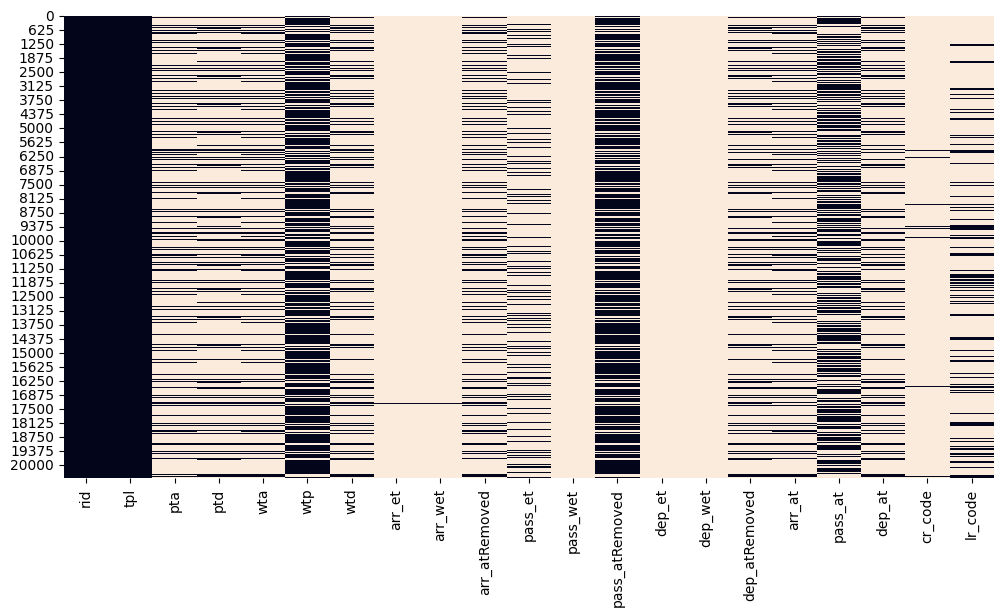

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_data.isnull(), cbar=False)
# plt.xticks(rotation=45)
plt.show()

### Pairplot

<Figure size 1200x600 with 0 Axes>

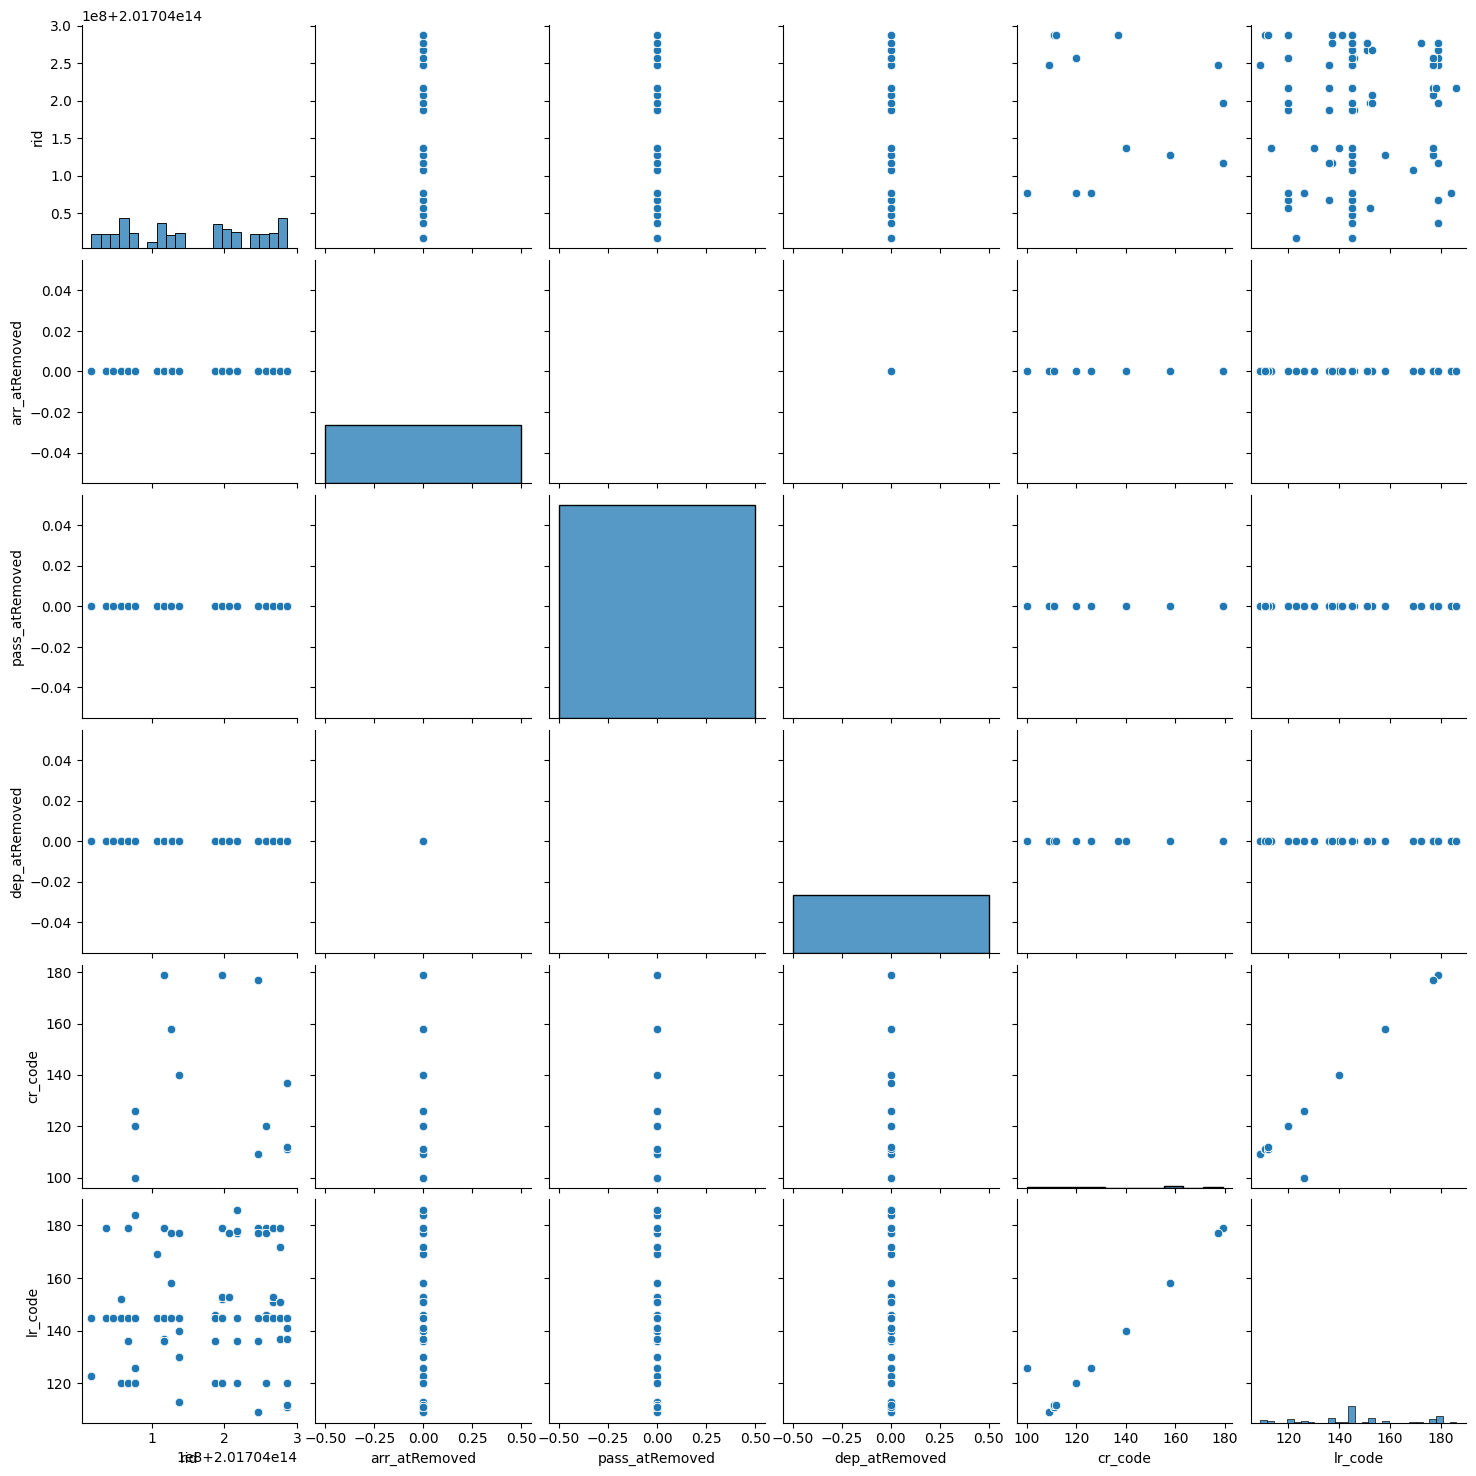

In [11]:
columns = test_data.columns
columns = columns.drop(columns_with_only_nan)

plt.figure(figsize=(12, 6))
sns.pairplot(test_data[columns])
plt.show()

In [12]:
unique_rid_values = test_data['rid'].unique()
unique_rid_values

array([201704017101248, 201704017101254, 201704017101259, 201704017101261,
       201704017101265, 201704017101275, 201704017101279, 201704017101283,
       201704017101289, 201704017101295, 201704017101301, 201704017101307,
       201704017101313, 201704017101319, 201704017101325, 201704017101331,
       201704017101337, 201704017101343, 201704017101349, 201704017101355,
       201704017101361, 201704017101367, 201704017101377, 201704017101391,
       201704017101397, 201704017101404, 201704017101412, 201704017101418,
       201704017101425, 201704017101436, 201704017101441, 201704017101452,
       201704037101240, 201704037101247, 201704037101253, 201704037101258,
       201704037101260, 201704037101264, 201704037101274, 201704037101278,
       201704037101282, 201704037101288, 201704037101294, 201704037101300,
       201704037101306, 201704037101312, 201704037101318, 201704037101324,
       201704037101330, 201704037101336, 201704037101342, 201704037101348,
       201704037101354, 2

## Column headers

| Code      | Description                   | Notes                         | Importance |
| ----      | -----------                   | -----                         | ---------- |
| rid       | Train RTTI Train Identifier   | Unique code for train travel  | Unlikely to affect times |
| tpl       | TIPLOC (Timing point locations) | Unique station code         | Likely to affect times        |
| pta       | Planned Time of Arrival       | 24hr Time value               | Likely to affect times    |
| ptd       | Planned Time of Departure     | 24hr Time value               | Likely to affect times  |
| wta       | Working (staff) Time of Arrival| 24hr Time value- with seconds|                         |
| wtp       | Working Time of Passing       | 24hr Time value               |       |
| wtd       | Working Time of Departure     | 24hr Time value- with seconds |       |
| arr_et    | Estimated Arrival Time        | 24hr Time value               |       |
| arr_wet   | Working Estimated Time        | 24hr Time value               |       |
| arr_atRemoved | true if actual replaced by estimated |                    |       |
| pass_et   | Estimated Passing Time        | 24hr Time value               |       |
| pass_wet  | Working Estimated Time        | ** 24hr Time value?           |       |
| arr_at    | True time of arrival          | 24hr Time value               |       |
| pass_atRemoved | true if actual replaced by estimated |                   |       |
| dep_et    | Estimated Departure           | 24hr Time value               |       |
| pass_at   | True time of train passing through | 24hr Time value          |       |
| dep_at    | True time of train departure  | 24hr Time value               |       |
| dep_wet    | Working Estimated Time       | ** 24hr Time value?           |       |
| dep_atRemoved | true if actual replaced by estimated |  | |
| arr_at    | Recorded Actual Time of Arrival | 24hr Time value             |$\hat{y}$|
| pass_at   | Actual Passing Time           | 24hr Time value               |$\hat{y}$|
| dep_at    | Actual Departure Time         | 24hr Time value               |$\hat{y}$|
| cr_code   | Cancellation Reason Code      | Float value                   |       |
| lr_code   | Late Running Reason           | Float Value                   |       |

## Creating new features for times
The features [aar_at, pass_at, dep_at] are 24hr time records as strings. These will be converted to a numerical values of [aar_at_HH, aar_at_MM]

In [13]:
#TODO:  For each time value, split into hour and minute , seconds

________

Using the RID code of '201701057101282', the table yields train travel from LIVST (London Liverpool Street) to (NRCH)

In [15]:
(test_data.loc[test_data['rid'] == unique_rid_values[0]])

,rid,tpl,pta,ptd,wta,wtp,wtd,arr_et,arr_wet,arr_atRemoved,pass_et,pass_wet,pass_atRemoved,dep_et,dep_wet,dep_atRemoved,arr_at,pass_at,dep_at,cr_code,lr_code
0,201704017101248,LIVST,NaN,06:30,NaN,NaN,06:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,06:29,NaN,NaN
1,201704017101248,BTHNLGR,NaN,NaN,NaN,06:33,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:32,NaN,NaN,NaN
2,201704017101248,BOWJ,NaN,NaN,NaN,06:35,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:34,NaN,NaN,NaN
3,201704017101248,STFD,NaN,06:38,06:37:30,NaN,06:38:30,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,06:36,NaN,06:37,NaN,NaN
4,201704017101248,MRYLAND,NaN,NaN,NaN,06:40,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:38,NaN,NaN,NaN
5,201704017101248,FRSTGTJ,NaN,NaN,NaN,06:41,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:40,NaN,NaN,NaN
6,201704017101248,MANRPK,NaN,NaN,NaN,06:41:30,NaN,NaN,NaN,NaN,06:40,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,201704017101248,ILFORD,NaN,NaN,NaN,06:42:30,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:41,NaN,NaN,NaN
8,201704017101248,SVNKNGS,NaN,NaN,NaN,06:43,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:42,NaN,NaN,NaN
9,201704017101248,GODMAYS,NaN,NaN,NaN,06:43:30,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,06:42,NaN,NaN,NaN


# Features

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

## Converting the time features into [Feature_Hour] & [Feature_Minute] for numerical coding

In [17]:
time_features = ['pta','ptd','arr_et','arr_wet','pass_et','pass_wet','arr_at','dep_et','pass_at','dep_at','dep_wet','arr_at','pass_at','dep_at']
time_features_split=[]

for feature in time_features:
    # Convert the column to datetime format
    test_data[feature] = pd.to_datetime(test_data[feature], format='%H:%M')

    # Create new columns for hour and minute
    test_data[feature + '_hour'] = test_data[feature].dt.hour
    time_features_split.append(feature + '_hour')
    test_data[feature + '_minute'] = test_data[feature].dt.minute
    time_features_split.append(feature + '_minute')


test_data.drop(time_features, axis=1, inplace=True)
test_data


,rid,tpl,wta,wtp,wtd,arr_atRemoved,pass_atRemoved,dep_atRemoved,cr_code,lr_code,pta_hour,pta_minute,ptd_hour,ptd_minute,arr_et_hour,arr_et_minute,arr_wet_hour,arr_wet_minute,pass_et_hour,pass_et_minute,pass_wet_hour,pass_wet_minute,arr_at_hour,arr_at_minute,dep_et_hour,dep_et_minute,pass_at_hour,pass_at_minute,dep_at_hour,dep_at_minute,dep_wet_hour,dep_wet_minute
0,201704017101248,LIVST,NaN,NaN,06:30,NaN,NaN,False,NaN,NaN,NaN,NaN,6.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,29.0,NaN,NaN
1,201704017101248,BTHNLGR,NaN,06:33,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,32.0,NaN,NaN,NaN,NaN
2,201704017101248,BOWJ,NaN,06:35,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.0,NaN,NaN,NaN,NaN
3,201704017101248,STFD,06:37:30,NaN,06:38:30,False,NaN,False,NaN,NaN,NaN,NaN,6.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,36.0,NaN,NaN,NaN,NaN,6.0,37.0,NaN,NaN
4,201704017101248,MRYLAND,NaN,06:40,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,38.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20588,201704287101449,MANNGTR,00:31:30,NaN,00:33,NaN,NaN,NaN,112.0,112.0,0.0,32.0,0.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20589,201704287101449,IPSWICH,00:43,NaN,00:45,NaN,NaN,NaN,112.0,112.0,0.0,43.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,201704287101449,STWMRKT,00:55,NaN,00:56:30,NaN,NaN,NaN,112.0,112.0,0.0,55.0,0.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20591,201704287101449,DISS,01:10,NaN,01:11:30,NaN,NaN,NaN,112.0,112.0,1.0,8.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
time_feautres_with_seconds = ['wta','wtp','wtd']

for feature in time_feautres_with_seconds:
    # Create new columns for hour, minute, and second
    test_data[feature + '_hour'] = test_data[feature + '_minute'] = test_data[feature + '_second'] = None
    
    time_features_split.append(feature + '_hour')
    time_features_split.append(feature + '_minute')
    time_features_split.append(feature + '_second')

    for i, time_value in enumerate(test_data[feature]):
        try:
            # Try to convert the time value to datetime format with seconds
            time_value_dt = pd.to_datetime(time_value, format='%H:%M:%S')
        except ValueError:
            try:
                # If the above fails, try to convert the time value to datetime format without seconds
                time_value_dt = pd.to_datetime(time_value, format='%H:%M')
            except ValueError:
                continue

        # Assign the hour, minute, and second to the new columns
        test_data.at[i, feature + '_hour'] = time_value_dt.hour
        test_data.at[i, feature + '_minute'] = time_value_dt.minute
        test_data.at[i, feature + '_second'] = time_value_dt.second if not pd.isnull(time_value_dt.second) else np.nan
        

test_data.drop(time_feautres_with_seconds, axis=1, inplace=True)
test_data

,rid,tpl,arr_atRemoved,pass_atRemoved,dep_atRemoved,cr_code,lr_code,pta_hour,pta_minute,ptd_hour,ptd_minute,arr_et_hour,arr_et_minute,arr_wet_hour,arr_wet_minute,pass_et_hour,pass_et_minute,pass_wet_hour,pass_wet_minute,arr_at_hour,arr_at_minute,dep_et_hour,dep_et_minute,pass_at_hour,pass_at_minute,dep_at_hour,dep_at_minute,dep_wet_hour,dep_wet_minute,wta_hour,wta_minute,wta_second,wtp_hour,wtp_minute,wtp_second,wtd_hour,wtd_minute,wtd_second
0,201704017101248,LIVST,NaN,NaN,False,NaN,NaN,NaN,NaN,6.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,30,0
1,201704017101248,BTHNLGR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,33,0,NaN,NaN,NaN
2,201704017101248,BOWJ,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,35,0,NaN,NaN,NaN
3,201704017101248,STFD,False,NaN,False,NaN,NaN,NaN,NaN,6.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,36.0,NaN,NaN,NaN,NaN,6.0,37.0,NaN,NaN,6,37,30,NaN,NaN,NaN,6,38,30
4,201704017101248,MRYLAND,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,40,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20588,201704287101449,MANNGTR,NaN,NaN,NaN,112.0,112.0,0.0,32.0,0.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,31,30,NaN,NaN,NaN,0,33,0
20589,201704287101449,IPSWICH,NaN,NaN,NaN,112.0,112.0,0.0,43.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,43,0,NaN,NaN,NaN,0,45,0
20590,201704287101449,STWMRKT,NaN,NaN,NaN,112.0,112.0,0.0,55.0,0.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,55,0,NaN,NaN,NaN,0,56,30
20591,201704287101449,DISS,NaN,NaN,NaN,112.0,112.0,1.0,8.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,0,NaN,NaN,NaN,1,11,30


## Encoding the categorical values

In [19]:
import category_encoders as ce

### Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

# create the LabelEncoder object
le = LabelEncoder()

# fit and transform the data
test_data['tpl'] = le.fit_transform(test_data['tpl'])

print(test_data['tpl'])

0        19
1         2
2         0
3        28
4        23
         ..
20588    20
20589    18
20590    29
20591     6
20592    24
Name: tpl, Length: 20593, dtype: int64


### Target Encoding

In [21]:
# encoder = ce.TargetEncoder(cols=[columns_for_target_encoding])

# # Fit the encoder using the categorical features and target
# encoder.fit(X_train[columns_for_target_encoding], y_train)

# # Transform the features, replace the categorical value with the mean target value for that category
# X_train_encoded = encoder.transform(X_train)
# X_valid_encoded = encoder.transform(X_test)

## evaluating the features for importance

In [22]:
# model = LinearRegression()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.coef_
# # summarize feature importance
# for i,v in enumerate(importance):
#  print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

# Partition data into training and validation sets

In [23]:
labels= ['arr_at_hour', 'arr_at_minute', 'pass_at_hour', 'pass_at_minute', 'dep_at_hour', 'dep_at_minute']

X= copy.deepcopy(test_data)
X.drop(labels, axis=1, inplace=True)

y= test_data[labels]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X Columns: {X.columns.values}\n\nY Columns {y.columns.values}\n')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# TODO: work out which single column can be used as y or work out a way to use multiple columns

X Columns: ['rid' 'tpl' 'arr_atRemoved' 'pass_atRemoved' 'dep_atRemoved' 'cr_code'
 'lr_code' 'pta_hour' 'pta_minute' 'ptd_hour' 'ptd_minute' 'arr_et_hour'
 'arr_et_minute' 'arr_wet_hour' 'arr_wet_minute' 'pass_et_hour'
 'pass_et_minute' 'pass_wet_hour' 'pass_wet_minute' 'dep_et_hour'
 'dep_et_minute' 'dep_wet_hour' 'dep_wet_minute' 'wta_hour' 'wta_minute'
 'wta_second' 'wtp_hour' 'wtp_minute' 'wtp_second' 'wtd_hour' 'wtd_minute'
 'wtd_second']

Y Columns ['arr_at_hour' 'arr_at_minute' 'pass_at_hour' 'pass_at_minute'
 'dep_at_hour' 'dep_at_minute']

(16474, 32) (4119, 32) (16474, 6) (4119, 6)


# Creating Neural Network

In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [25]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/joshuanewton/Library/CloudStorage/OneDrive-UniversityofEastAnglia/Modules/Artificial Intelligence/Assignments/Assignment 02/chatbot/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 2/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 3/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 12/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 13/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [27]:
model.predict(X_test)

  1/129 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]], dtype=float32)